In [160]:
%matplotlib notebook
import numpy as np
import csv
import perceptron
import matplotlib.pyplot as plt

In [187]:
with open('heart_new.csv', newline='') as f:
    data_list = list(csv.reader(f, quoting=csv.QUOTE_NONNUMERIC))

#shuffling data set - it is ordered by target
#np.random.seed(213718022)
#np.random.shuffle(data_list)

#split target from data
target = []
for i in range(len(data_list)):
    target = np.append(target, data_list[i].pop())

data = np.array(data_list)

#split target and data into train, validation and test sets

# dostosowywać do potrzeb i datasetu
train_X = data[:300]
train_y = target[:300]
print('Shape of training set: ' + str(train_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(train_y)
labels = np.unique(train_y)
train_Y = np.zeros((n_examples, len(labels)))
for i in range(len(labels)):
    # Find examples with with a Label = lables(i)
    ix_tmp = np.where(train_y == labels[i])[0]
    train_Y[ix_tmp, i] = 1

# dostosowywać do potrzeb i datasetu
# walidacja na tą chwilę nie przeprowadzana
valid_X = data[250:277]
valid_y = target[250:277]
print('Shape of validation set: ' + str(valid_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(valid_y)
labels = np.unique(valid_y)
valid_Y = np.zeros((n_examples, len(labels)))
for i in range(len(labels)):
    # Find examples with with a Label = lables(i)
    ix_tmp = np.where(valid_y == labels[i])[0]
    valid_Y[ix_tmp, i] = 1


# dostosowywać do potrzeb i datasetu
test_X = data[300:]
test_y = target[300:]
print('Shape of test set: ' + str(test_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(test_y)
labels = np.unique(test_y)
test_Y = np.zeros((n_examples, len(labels)))
for i in range(len(labels)):
    # Find examples with with a Label = lables(i)
    ix_tmp = np.where(test_y == labels[i])[0]
    test_Y[ix_tmp, i] = 1



Shape of training set: (300, 13)
Shape of validation set: (27, 13)
Shape of test set: (620, 13)


In [194]:
#Creating the MLP object
classifier = perceptron.Perceptron(layer_sizes = [13, 10, 5])
print(classifier)

<IPython.core.display.Javascript object>


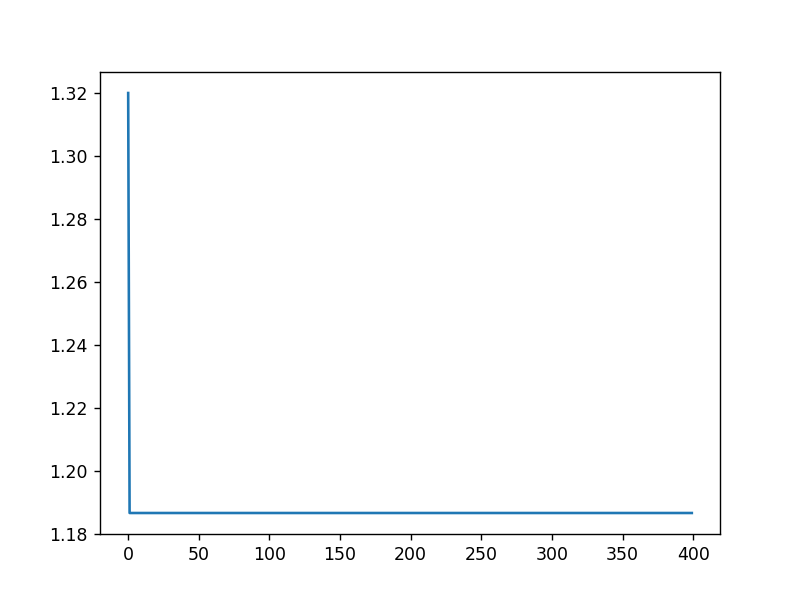

Training Accuracy: 54.333333333333336


In [195]:
# Training with Backpropagation and 400 iterations
iterations = 400
loss = np.zeros([iterations,1])

for ix in range(iterations):
    classifier.train(train_X, train_Y, 1)
    Y_hat = classifier.solve(train_X)
    y_tmp = np.argmax(Y_hat, axis=1)
    y_hat = labels[y_tmp]
    
    loss[ix] = (0.5)*np.square(y_hat - train_y).mean()

# Ploting loss vs iterations
plt.figure()
ix = np.arange(iterations)
plt.plot(ix, loss)

# Training Accuracy
Y_hat = classifier.solve(train_X)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == train_y))
print('Training Accuracy: ' + str(acc*100))

In [196]:
# Test Accuracy
Y_hat = classifier.solve(test_X)
#print(Y_hat)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

#for i in range(len(y_hat)):
 #   if y_hat[i] != 0:
  #      y_hat[i] = 1
   # if test_y[i] != 0:
    #    test_y[i] = 1
    
n_same = 0
for i in range(len(y_hat)):
    if (y_hat[i] > 0 and test_y[i]>0) or (y_hat[i] < 1 and test_y[i] < 1):
        n_same+=1
        
print(n_same / len(y_hat))

acc = 1 - np.mean(1 * ((y_hat>0) ^ (test_y>0)))
print('Testing Accuracy: ' + str(acc*100)) 
print(y_hat)
print(test_y)

0.5887096774193549
Testing Accuracy: 58.87096774193547
[0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 2. 2. 0. 2. 0. 0. 0.
 2. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0. 3. 0. 0. 0. 2. 2. 2. 3. 2. 3. 2. 2. 2.
 2. 2. 3. 0. 0. 2. 2. 0. 2. 0. 0. 0. 2. 2. 2. 3. 0. 2. 3. 2. 0. 2. 2. 2.
 0. 2. 0. 3. 0. 0. 3. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 3.
 0. 0. 2. 0. 3. 0. 3. 0. 2. 2. 0. 0. 2. 0. 0. 0. 0. 2. 0. 3. 3. 3. 3. 3.
 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2. 0. 0. 0. 3. 0. 0. 0. 3. 0. 0. 3. 3.
 0. 0. 0. 3. 3. 0. 3. 3. 0. 3. 0. 3. 0. 0. 0. 0. 0. 0. 0. 2. 3. 3. 0. 3.
 0. 3. 0. 2. 0. 3. 3. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.